In [76]:
# import libarieries 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
# For Machine Learning models
from sklearn import preprocessing, svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse
from math import sqrt 
import warnings
warnings.filterwarnings('ignore')

In [77]:
# importing data
from google.colab import files
uploaded = files.upload()

Saving covid_age.csv to covid_age (1).csv
Saving world_covid_19.csv to world_covid_19 (1).csv


In [78]:
# Read the Data
df= pd.read_csv('world_covid_19.csv',parse_dates=['Date'],dayfirst=True)
df2 = pd.read_csv('covid_age.csv')

In [79]:
display(df.head())
display(df.shape)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


(6603, 9)

In [80]:
# Rename the columns
df = df.rename(columns={'Serious or Critical':'Serious'})
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [81]:
df.fillna(0)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,0.0,6.0,0.0,6.0,0.0,0.0
6599,2020-05-18,Western Sahara,595462,0.0,6.0,0.0,6.0,0.0,0.0
6600,2020-05-18,Anguilla,14987,0.0,3.0,0.0,3.0,0.0,0.0
6601,2020-05-18,Lesotho,2140235,0.0,1.0,0.0,0.0,0.0,1.0


In [82]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

Date               True
Country            True
Population         True
Total Tests        True
Total Cases        True
Total Deaths       True
Total Recovered    True
Serious            True
Active Cases       True
dtype: bool

In [83]:
df = pd.DataFrame(df).fillna(0)
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,0.0,6.0,0.0,6.0,0.0,0.0
6599,2020-05-18,Western Sahara,595462,0.0,6.0,0.0,6.0,0.0,0.0
6600,2020-05-18,Anguilla,14987,0.0,3.0,0.0,3.0,0.0,0.0
6601,2020-05-18,Lesotho,2140235,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
# Check the missing values
df.isnull().sum()

Date               0
Country            0
Population         0
Total Tests        0
Total Cases        0
Total Deaths       0
Total Recovered    0
Serious            0
Active Cases       0
dtype: int64

In [85]:
display(df2.head())
display(df2.shape)

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


(213, 4)

In [86]:
df2 = df2.rename(columns={'Fraction age 0-14 years':'Age_0-14','Fraction age 15-64 years':'Age_15-64','Fraction age 65+ years':'Age_65+' })
df2.head()

,Country,Age_0-14,Age_15-64,Age_65+
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [87]:
df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
6598,2020-05-18,St. Barth,9874,0.0,6.0,0.0,6.0,0.0,0.0
6599,2020-05-18,Western Sahara,595462,0.0,6.0,0.0,6.0,0.0,0.0
6600,2020-05-18,Anguilla,14987,0.0,3.0,0.0,3.0,0.0,0.0
6601,2020-05-18,Lesotho,2140235,0.0,1.0,0.0,0.0,0.0,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,0.0,1.0,0.0,1.0,0.0,0.0


In [88]:
display(df.head())
display(df.shape)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0


(6603, 9)

In [89]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6603 non-null   datetime64[ns]
 1   Country          6603 non-null   object        
 2   Population       6603 non-null   int64         
 3   Total Tests      6603 non-null   float64       
 4   Total Cases      6603 non-null   float64       
 5   Total Deaths     6603 non-null   float64       
 6   Total Recovered  6603 non-null   float64       
 7   Serious          6603 non-null   float64       
 8   Active Cases     6603 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [90]:
# Summary Statisitics
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,1.806864e+05,1.680405e+04,1151.147206,5602.691201,241.139331,9.875109e+03
std,1.411537e+08,6.981654e+05,8.829716e+04,6016.411612,22986.345036,1322.814259,6.512407e+04
min,8.010000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.672680e+05,5.720000e+02,7.600000e+01,1.000000,17.000000,0.000000,2.500000e+01
50%,6.859926e+06,1.076100e+04,5.940000e+02,11.000000,183.000000,2.000000,2.600000e+02
75%,2.546422e+07,1.019110e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [91]:
# Check the columns
df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious', 'Active Cases'],
      dtype='object')

In [92]:
# Current date
today = df[df.Date == '2020-04-18']
today

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
208,2020-04-18,St. Barth,9874,0.0,6.0,0.0,5.0,0.0,1.0
209,2020-04-18,Western Sahara,595462,0.0,6.0,0.0,0.0,0.0,6.0
210,2020-04-18,Anguilla,14987,0.0,3.0,0.0,1.0,0.0,2.0
211,2020-04-18,Lesotho,2140235,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Sorting data with number of confirmed cases
max_confirmed_cases = today.sort_values(by='Active Cases',ascending=False)
max_confirmed_cases

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
...,...,...,...,...,...,...,...,...,...
203,2020-04-18,Greenland,56759,1043.0,11.0,0.0,11.0,0.0,0.0
200,2020-04-18,Comoros,867268,0.0,0.0,0.0,0.0,0.0,0.0
168,2020-04-18,Mauritania,4633922,913.0,7.0,1.0,6.0,0.0,0.0
211,2020-04-18,Lesotho,2140235,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# List the top 5 cases observed
top_country_confirmed = max_confirmed_cases[0:5]
top_country_confirmed

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0


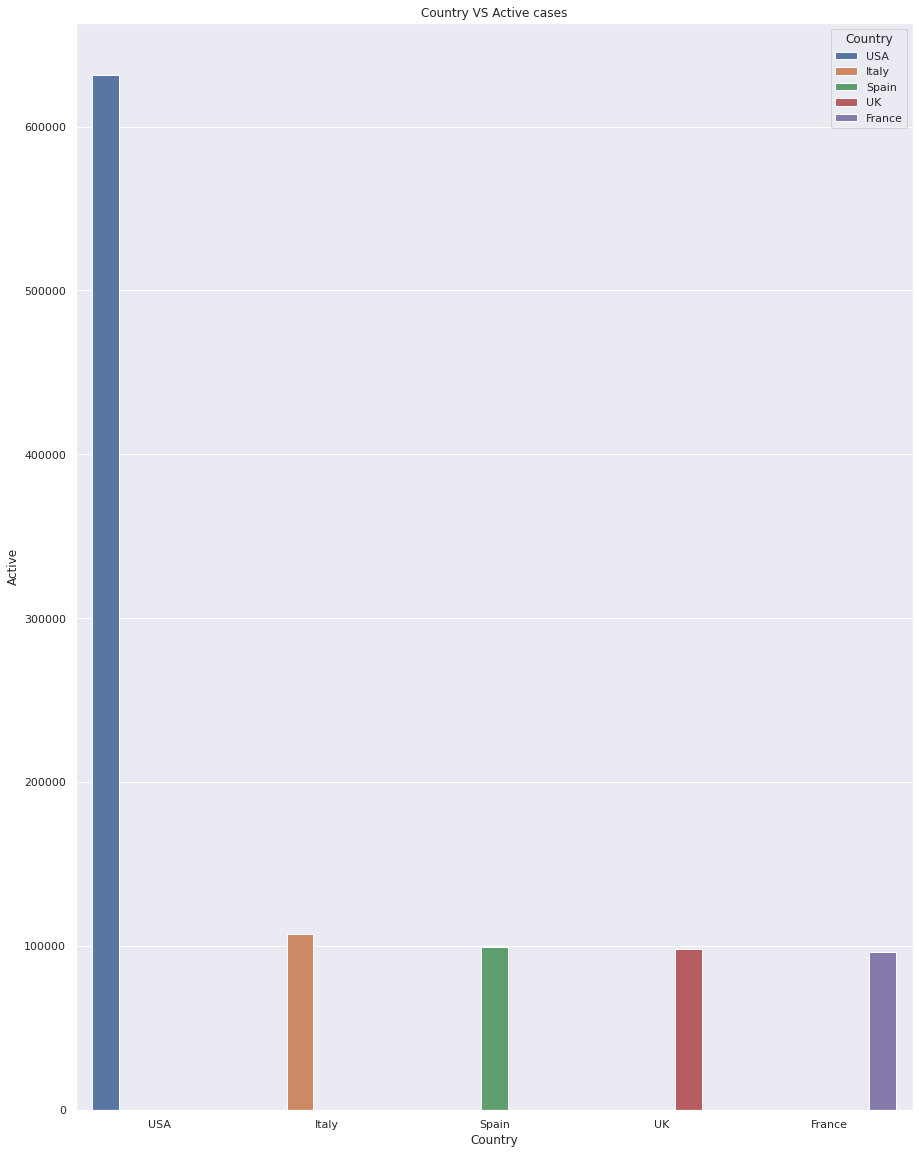

In [95]:
# Making bar plot for country with acitve cases 
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='Country',y='Active Cases',data=top_country_confirmed,hue='Country')
plt.title('Country VS Active cases')
plt.xlabel('Country')
plt.ylabel('Active')
plt.show()

''' From above the plot it is clear that total 6 lakh cases was observed in USA Country itlsef'''

In [96]:
# Sorting data with respect to recovered cases
max_cured_cases = today.sort_values(by='Total Recovered',ascending=False)
max_cured_cases

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
12,2020-04-18,China,1439323776,0.0,82719.0,4632.0,77029.0,85.0,1058.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0
...,...,...,...,...,...,...,...,...,...
196,2020-04-18,Saint Kitts and Nevis,53155,234.0,14.0,0.0,0.0,0.0,14.0
145,2020-04-18,Sao Tome and Principe,218653,19.0,4.0,0.0,0.0,0.0,4.0
188,2020-04-18,Belize,396732,651.0,18.0,2.0,0.0,1.0,16.0
189,2020-04-18,Fiji,895677,0.0,17.0,0.0,0.0,0.0,17.0


In [97]:
# Getting top Recovered cases
top_cured_cases = max_cured_cases[0:5]
top_cured_cases

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
12,2020-04-18,China,1439323776,0.0,82719.0,4632.0,77029.0,85.0,1058.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


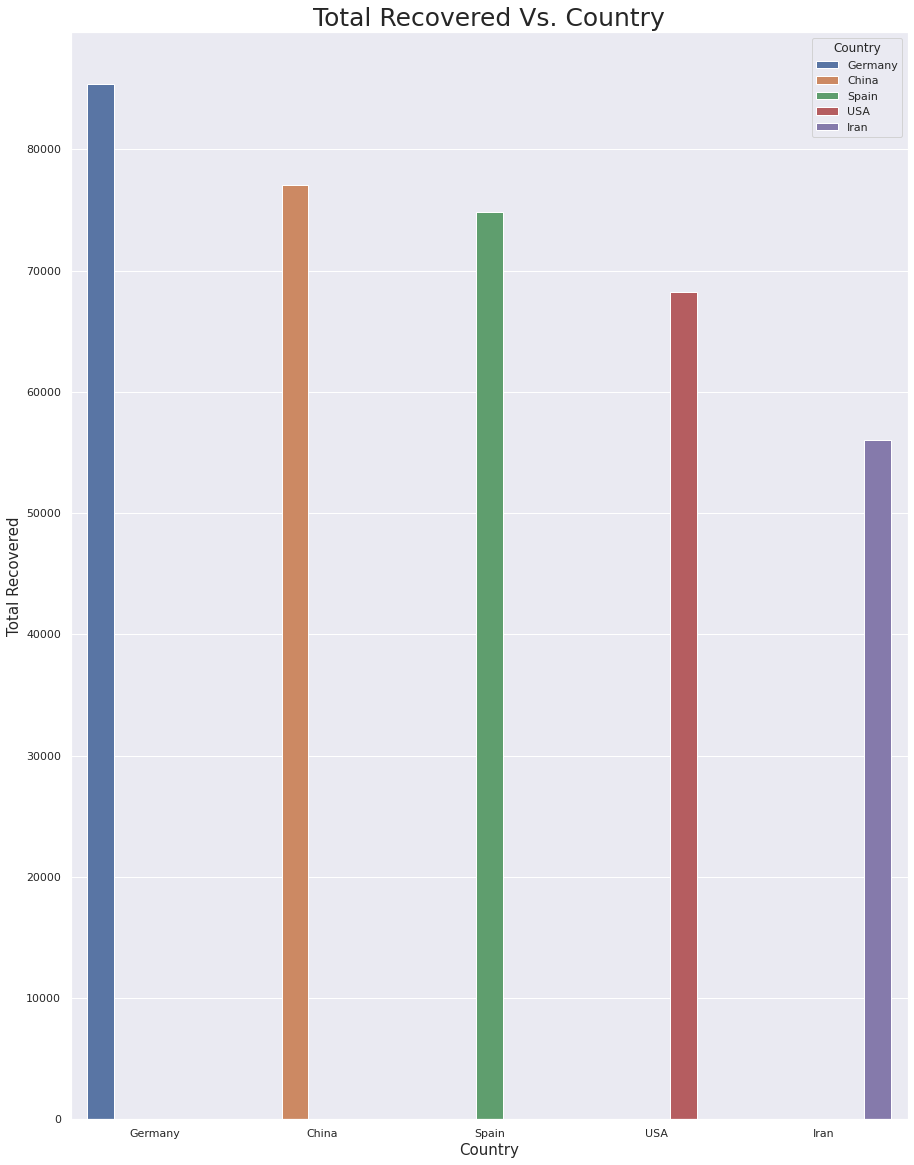

In [98]:
# Making bar plot for acitve cases with age 
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='Country',y='Total Recovered',data=top_cured_cases,hue='Country')
plt.title('Total Recovered Vs. Country',fontsize=25)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Total Recovered',fontsize=15)
plt.show()

'''Largest recovery was observed in Germany it was around 80000 ''' 

In [99]:
# GERMANY
germany = df[df.Country=='Germany']
germany

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
220,2020-04-19,Germany,83752855,1728357.0,145742.0,4642.0,88000.0,2889.0,53100.0
433,2020-04-20,Germany,83752855,1728357.0,147065.0,4862.0,91500.0,2889.0,50703.0
646,2020-04-21,Germany,83752855,1728357.0,148453.0,5086.0,95200.0,2889.0,48167.0
859,2020-04-22,Germany,83752855,2072669.0,150648.0,5315.0,99400.0,2908.0,45933.0
1072,2020-04-23,Germany,83752855,2072669.0,153129.0,5575.0,103300.0,2908.0,44254.0
1285,2020-04-24,Germany,83752855,2072669.0,154999.0,5760.0,106800.0,2908.0,42439.0
1498,2020-04-25,Germany,83752855,2072669.0,156513.0,5877.0,109800.0,2908.0,40836.0
1711,2020-04-26,Germany,83752855,2072669.0,157770.0,5976.0,112000.0,2570.0,39794.0
1924,2020-04-27,Germany,83752855,2072669.0,158758.0,6126.0,114500.0,2409.0,38132.0


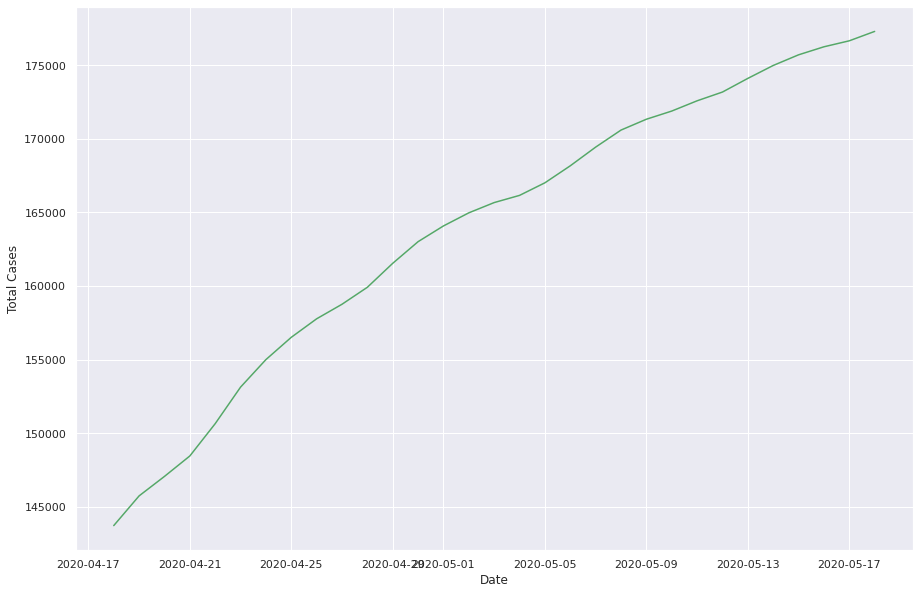

In [100]:
# Visualize confirmed cases in US
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Total Cases',data=germany,color = 'g')
plt.show()

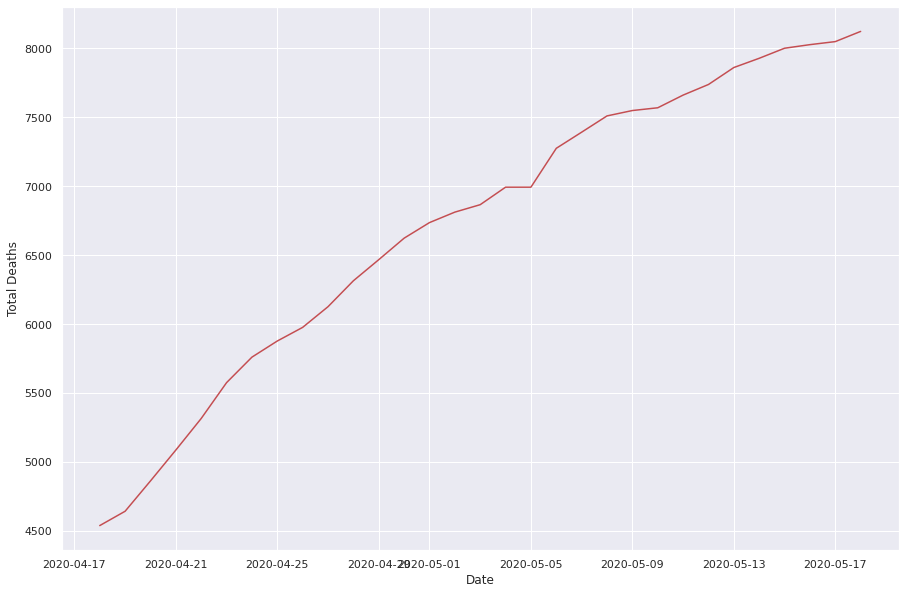

In [101]:
# Visualizing the death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Total Deaths',data=germany,color='r')
plt.show()

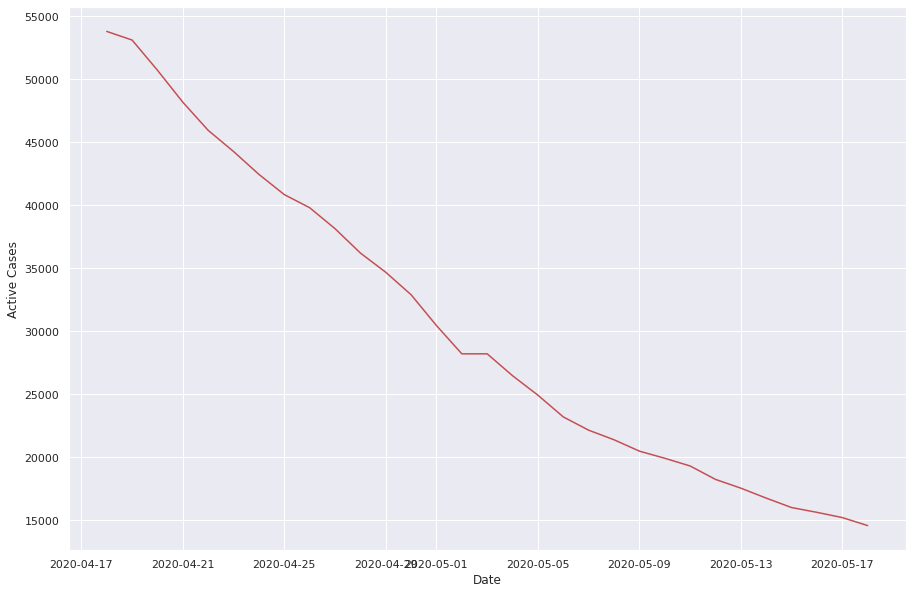

In [102]:
# Visualizing the Active cases
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Active Cases',data=germany,color='r')
plt.show()

In [103]:
# Spain
spain = df[df.Country == 'Spain']
spain

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
215,2020-04-19,Spain,46752703,930230.0,198674.0,20453.0,77357.0,7371.0,100864.0
428,2020-04-20,Spain,46752703,930230.0,200210.0,20852.0,80587.0,7371.0,98771.0
641,2020-04-21,Spain,46752703,930230.0,204178.0,21282.0,82514.0,7705.0,100382.0
854,2020-04-22,Spain,46752703,930230.0,208389.0,21717.0,85915.0,7705.0,100757.0
1067,2020-04-23,Spain,46752703,930230.0,213024.0,22157.0,89250.0,7705.0,101617.0
1280,2020-04-24,Spain,46752703,930230.0,219764.0,22524.0,92355.0,7705.0,104885.0
1493,2020-04-25,Spain,46752703,930230.0,223759.0,22902.0,95708.0,7705.0,105149.0
1706,2020-04-26,Spain,46752703,1199548.0,226629.0,23190.0,117727.0,7764.0,85712.0
1919,2020-04-27,Spain,46752703,1345560.0,229422.0,23521.0,120832.0,7764.0,85069.0


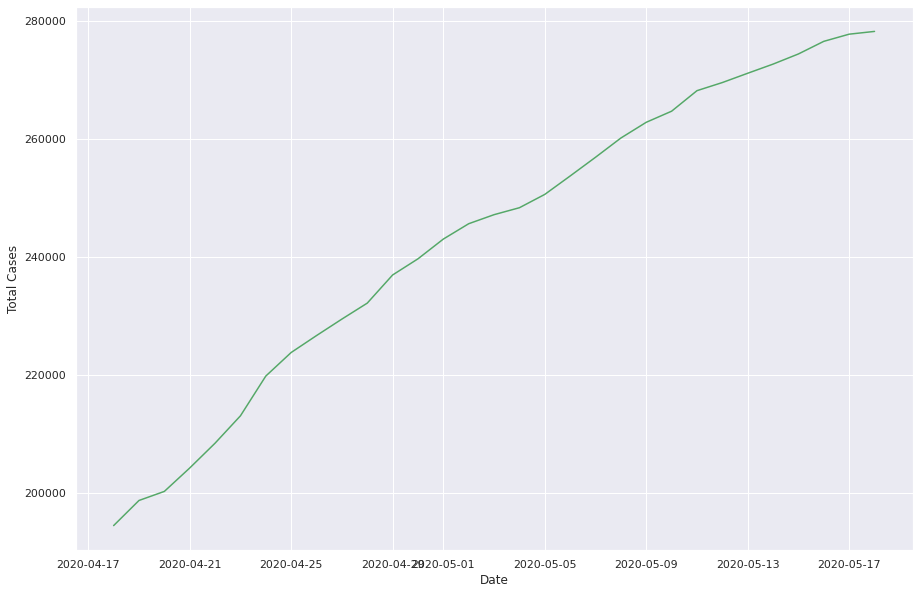

In [104]:
# Visualizing the confirmed cases in spain
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Total Cases',data=spain,color='g')
plt.show()

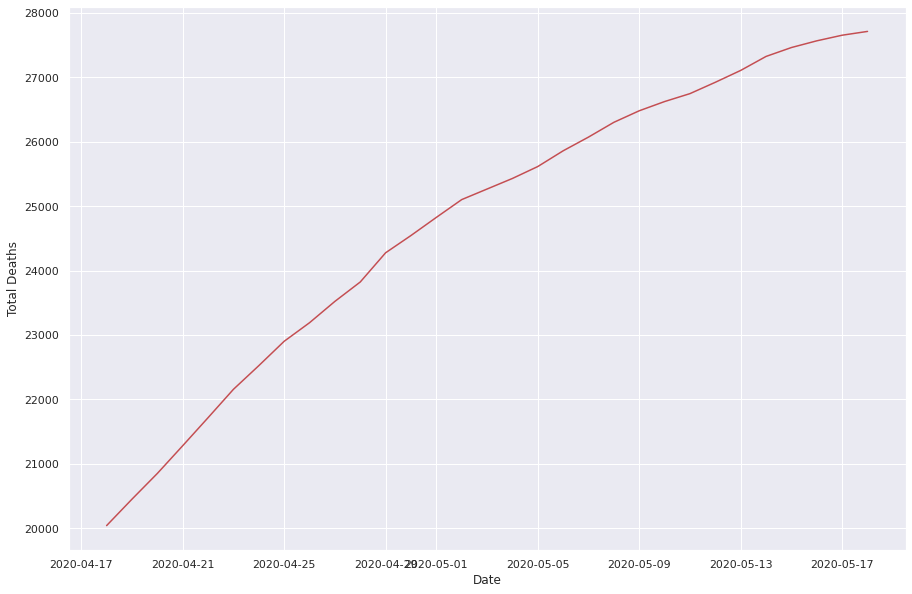

In [105]:
# Visuliazing the death cases in spain
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Total Deaths',data=spain,color ='r')
plt.show()

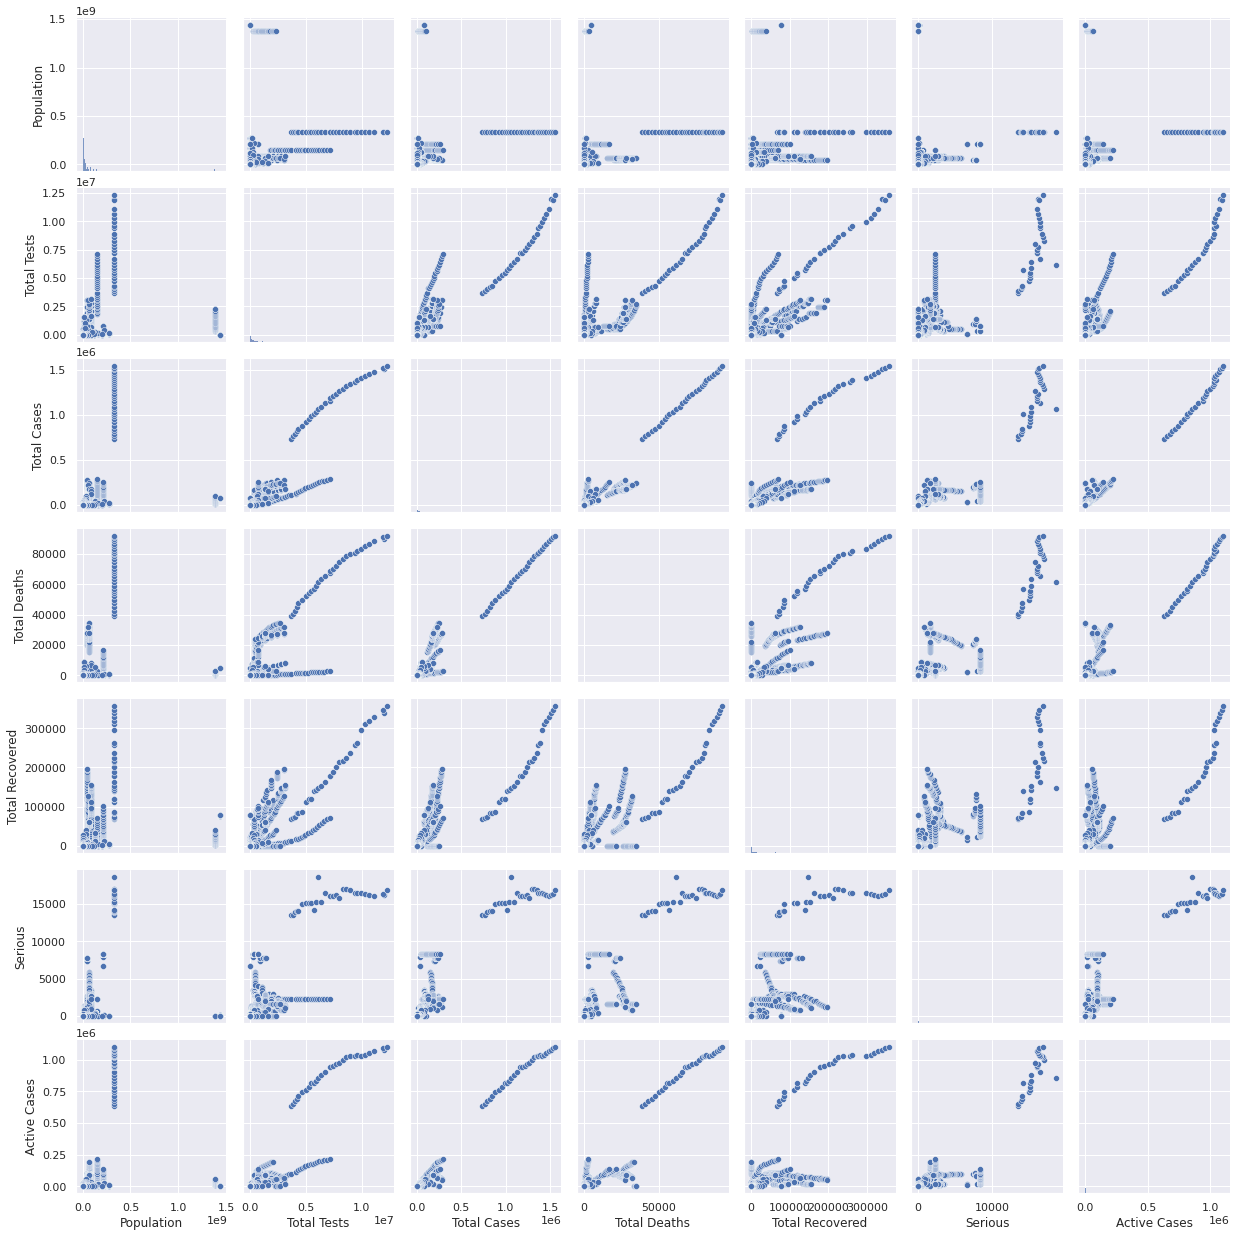

In [106]:
# Check the pairplot
sns.pairplot(df)
plt.show()

In [107]:
# Germany
germany

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
220,2020-04-19,Germany,83752855,1728357.0,145742.0,4642.0,88000.0,2889.0,53100.0
433,2020-04-20,Germany,83752855,1728357.0,147065.0,4862.0,91500.0,2889.0,50703.0
646,2020-04-21,Germany,83752855,1728357.0,148453.0,5086.0,95200.0,2889.0,48167.0
859,2020-04-22,Germany,83752855,2072669.0,150648.0,5315.0,99400.0,2908.0,45933.0
1072,2020-04-23,Germany,83752855,2072669.0,153129.0,5575.0,103300.0,2908.0,44254.0
1285,2020-04-24,Germany,83752855,2072669.0,154999.0,5760.0,106800.0,2908.0,42439.0
1498,2020-04-25,Germany,83752855,2072669.0,156513.0,5877.0,109800.0,2908.0,40836.0
1711,2020-04-26,Germany,83752855,2072669.0,157770.0,5976.0,112000.0,2570.0,39794.0
1924,2020-04-27,Germany,83752855,2072669.0,158758.0,6126.0,114500.0,2409.0,38132.0


In [108]:
# Drop the uncessary column 
df = df.drop(columns=['Country','Population','Serious'])
df.head()

,Date,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases
0,2020-04-18,3722145.0,738792.0,39014.0,68269.0,631509.0
1,2020-04-18,1831892.0,36793.0,313.0,3057.0,33423.0
2,2020-04-18,930230.0,194416.0,20043.0,74797.0,99576.0
3,2020-04-18,62985.0,36722.0,2361.0,14026.0,20335.0
4,2020-04-18,460437.0,114217.0,15464.0,0.0,98409.0


In [109]:
# Converting date-time to ordinal
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df.head()

,Date,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases
0,737533,3722145.0,738792.0,39014.0,68269.0,631509.0
1,737533,1831892.0,36793.0,313.0,3057.0,33423.0
2,737533,930230.0,194416.0,20043.0,74797.0,99576.0
3,737533,62985.0,36722.0,2361.0,14026.0,20335.0
4,737533,460437.0,114217.0,15464.0,0.0,98409.0


In [110]:
# pick total death as forecast column
forecast_col = 'Total Deaths'

# Chosing 30 days as number of forecast days
forecast_out = int((9))
print('length =',len(df), "and forecast_out =", forecast_out)

length = 6603 and forecast_out = 9


## Creating label by shifting 'Total Deaths' according to 'forecast_out'

In [111]:
df['temp'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))
print('\n')
# verify rows with NAN in Label column 
print(df.tail(2))

     Date  Total Tests  Total Cases  ...  Total Recovered  Active Cases    temp
0  737533    3722145.0     738792.0  ...          68269.0      631509.0  5031.0
1  737533    1831892.0      36793.0  ...           3057.0       33423.0   521.0

[2 rows x 7 columns]


        Date  Total Tests  Total Cases  ...  Total Recovered  Active Cases  temp
6601  737563          0.0          1.0  ...              0.0           1.0   NaN
6602  737563          0.0          1.0  ...              1.0           0.0   NaN

[2 rows x 7 columns]


In [112]:
# Define features Matrix X by excluding the label column which we just created 
X = np.array(df.drop(['temp'], 1))

# Using a feature in sklearn, preposessing to scale features
X = preprocessing.scale(X)
print(X[1,:])

[-1.67705098  2.36524283  0.22639989 -0.1393207  -0.11075636  0.36161242]


In [113]:
# X contains last 'n= forecast_out' rows for which we don't have label data
# Put those rows in different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]

X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 9 & Length of X : 6594


In [114]:
# Define vector y for the data we have prediction for
# make sure length of X and y are identical
y = np.array(df['temp'])
y = y[:-forecast_out]
print('Length of y: ',len(y))

Length of y:  6594


# Machine Learning Models

In [115]:
# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,explained_variance_score
import sklearn 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [116]:
# split into test and train data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('length of X_train and X_test: ', len(X_train), len(X_test))

length of X_train and X_test:  5275 1319


In [118]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

# Linear Regression

In [119]:
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)
# Test
accuracy = lr.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.006657186273038685


In [120]:
# Predict using our Model
forecast_prediction = lr.predict(X_forecast_out)
print(forecast_prediction)

[1267.20093969 1267.18533976 1265.86045768 1266.97826918 1267.17520494
 1267.17520494 1267.15976409 1267.14605603 1267.14947019]


In [121]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state 
print("max r2 score coressponding to",final_r_state,"is",max_r_score)

max r2 score coressponding to 86 is 0.015286491523508694


# Bagging Regressor

In [122]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, 
                      verbose=0)
br.fit(X_train, y_train)
y_pred3 = br.predict(X_test)
print('RMSLE:', sqrt(mean_squared_log_error(y_test, y_pred3)))
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred3)))

RMSLE: 1.8288769428126623
RMSE: 1069.781761494646


# RandomForest Regressor

In [123]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [124]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [125]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [126]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  305.61870553854334
R-squared:  0.997287676076575


In [127]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  712.8301604671348
R-squared:  0.9876963768044575


# Gradient Boosting Regressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(X_train, y_train)
y_pred2 = gb.predict(X_test)
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred2)))

RMSE: 1393.3315497770102


# Descision Tree Regressor 

In [129]:
from sklearn.tree import DecisionTreeRegressor
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [130]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 15}

In [131]:
#Predict train result and test result
y_train_pred =tree.predict(X_train) 
y_test_pred =tree.predict(X_test)

In [132]:
print("Train Results for Decision Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Decision Regressor Model:
--------------------------------------------------
Root mean squared error:  215.94409590360635
R-squared:  0.998645857527588


In [133]:
print("Test Results for Decision Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Regressor Model:
--------------------------------------------------
Root mean squared error:  513.9671732541793
R-squared:  0.9936036583598925


KNN Regressor 

In [134]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [135]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')


{'n_neighbors': 4}

In [136]:
y_train_pred =knn_regressor.predict(X_train)
y_test_pred =knn_regressor.predict(X_test) 

In [137]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  4130.1719332907505
R-squared:  0.5046434009608529


In [138]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  5944.063104648949
R-squared:  0.14448483672553503


# Conclusion 
After observing all models Decision Tree Regressor and  RandomForest are the best model on test.We can use it for further.

In [139]:
# Save the model
import joblib
joblib.dump(random_regressor,'world_covid-19.pkl')

['world_covid-19.pkl']